In [ ]:
# amino acids dictionary
aa_Dict = {
    "Ala": "A",
    "Arg": "R",
    "Asn": "N",
    "Asp": "D",
    "Cys": "C",
    "Gln": "Q",
    "Glu": "E",
    "Gly": "G",
    "His": "H",
    "Ile": "I",
    "Leu": "L",
    "Lys": "K",
    "Met": "M",
    "Phe": "F",
    "Pro": "P",
    "Ser": "S",
    "Thr": "T",
    "Trp": "W",
    "Tyr": "Y",
    "Val": "V",
    "Ter": "termination",
    "fs": "frame shift"
}

In [ ]:
# Positions used for local interaction analysis (close proximity to DNA)
mutatex_positions= [870, 871, 872, 873, 896, 897, 898, 899, 919, 920, 921, 927, 946, 947, 948, 968, 994, 996, 1000, 1003, 1004, 1005, 1007, 1008, 1110, 1112, 1113, 1120, 1121, 1122, 1123, 1139, 1162, 1163, 1164, 1165, 1166, 1168, 1169, 1170]

In [154]:
# Reading file downloaded from from ClinVar repository consisting pathogenic mutations of BLM only
import re
infile = open("pathogenic_BLM.txt", "r")
mutations_list = []
mutations_positions = []
for i, line in enumerate(infile):
    if re.match(r'\(p\.[A-Za-z]+\d+[A-Za-z]+\)', line.split()[1]) and re.search(r'Bloom', line):
        #print(line)
        mutation = line.split()[1][3:-1]
        position = re.findall(r'\d+', line.split()[1])
        mutations_positions.append(position[0])
        mutations_list.append(mutation)
#print(mutations_list)
infile.close()

# Filtering pathogenic mutations to leave only those that are around the region of DNA binding 
patho_mutations_filtered = []
patho_positions = []
for mutation in mutations_list:
    position = re.search(r'\d+', mutation)
    if position:
        position = int(position.group())
        if 870 <= position <= 1170:
            patho_mutations_filtered.append(mutation)
            patho_positions.append(position)
#print(patho_mutations_filtered)
#print(patho_positions)

# How many pathogenic positions were used for local interaction analysis (overlap of 2 lists)?
overlap = set(mutatex_positions) & set(patho_positions)
print("Pathogenic positions according to ClinVar in the region of in of interest (region interacting with DNA duplex) are:")
for position in overlap:
    print(position)

Pathogenic positions according to ClinVar in the region of in of interest (region interacting with DNA duplex) are:
994
1123
899
1003
1004
1166
1170
1139


In [ ]:
# All pathogenic mutations are either due to frameshifts or the insertion of an early termination codon.
"""
994 - 'Thr994fs'
1123 - 'Ser1123fs'
899 - 'Arg899Ter'
1003 - 'Arg1003Ter'
1004 - 'Leu1004fs'
1166 - 'Gln1166Ter'
1170 - 'Tyr1170Ter'
1139 - 'Arg1139Ter'
"""

In [70]:
"""for element in filtered_mutation_list:
    aa1 = three_to_one[element[0:3]]
    #aa2 = three_to_one[element[-3:]]
    if re.search(r'fs', element):
        number = element[3:-2]
    else:
        number = element[3:-3]
    combination = aa1+"A"+number
    print(combination)"""

'for element in filtered_mutation_list:\n    aa1 = three_to_one[element[0:3]]\n    #aa2 = three_to_one[element[-3:]]\n    if re.search(r\'fs\', element):\n        number = element[3:-2]\n    else:\n        number = element[3:-3]\n    combination = aa1+"A"+number\n    print(combination)'

In [155]:
# Analyzing results from local interaction
# Putting all the results in the dictionary
infile = open("binding_DNA_results.txt", "r")
aa_list = []
mutatex_results_Dict = {}
for i, line in enumerate(infile):
    if i == 0:
        for element in line.split()[3:]:
            aa_list.append(element)
    if i >= 1:
        for i, element in enumerate(line.split()[3:]):
            key = line.split()[0] + line.split()[2] + aa_list[i]
            value = float(line.split()[3+i])
            if line.split()[0] != aa_list[i]:
                mutatex_results_Dict[key] = value
infile.close()
#print(mutatex_results_Dict)

# ΔΔG < -1 kcal/mol we could expect the mutation to be stabilizing for the interface and if the ΔΔG > 1 kcal/mol destabilizing
stabilizing_Dict = {}
destabilizing_Dict = {}
for key, value in mutatex_results_Dict.items():
    if value <= -1:
        stabilizing_Dict[key] = value
    elif value >= 1:
        destabilizing_Dict[key] = value
        
print("Number of stabilizing mutations is:", str(len(stabilizing_Dict))+",", "which are:")
for element in stabilizing_Dict.items():
    print(element)

# List of all destabilizing mutations
destabilizing_list = list(destabilizing_Dict.keys())
print("\nNumber of destabilizing mutations is:", str(len(destabilizing_Dict))+",", "which are:")
for element in destabilizing_Dict.items():
    print(element)

Number of stabilizing mutations is: 6, which are:
('R1003M', -1.17708)
('A1163M', -1.34504)
('D1165M', -1.20716)
('D1165K', -1.43444)
('D1165R', -1.66094)
('Q1166W', -2.00714)

Number of destabilizing mutations is: 177, which are:
('P871G', 1.03654)
('P871W', 1.25372)
('P871S', 1.18066)
('P871Y', 1.36792)
('P871N', 1.0991)
('P871E', 1.26286)
('K872G', 1.3384)
('K872P', 1.82708)
('K872T', 1.48664)
('L896W', 1.47882)
('L896Y', 1.59764)
('L896R', 1.29528)
('S897L', 1.11036)
('S897F', 8.08614)
('S897W', 7.96494)
('S897T', 1.32974)
('S897Y', 8.75512)
('S897K', 1.19916)
('S897R', 1.33412)
('S897H', 6.58274)
('R898F', 1.15016)
('R898W', 1.7688)
('R898P', 4.4203)
('R898Y', 1.5511)
('R898D', 1.42556)
('R899P', 1.09308)
('A920P', 8.87456)
('G921V', 1.38438)
('G921I', 1.06518)
('G921P', 1.08302)
('G921T', 1.28878)
('T946G', 2.02442)
('T946A', 1.46864)
('T946V', 2.10388)
('T946L', 1.01434)
('T946I', 2.79038)
('T946M', 3.70798)
('T946F', 5.74094)
('T946W', 26.04629)
('T946P', 1.78656)
('T946C', 1.5

In [156]:
destabilizing_list = list(destabilizing_Dict.keys())
print(destabilizing_list)

['P871G', 'P871W', 'P871S', 'P871Y', 'P871N', 'P871E', 'K872G', 'K872P', 'K872T', 'L896W', 'L896Y', 'L896R', 'S897L', 'S897F', 'S897W', 'S897T', 'S897Y', 'S897K', 'S897R', 'S897H', 'R898F', 'R898W', 'R898P', 'R898Y', 'R898D', 'R899P', 'A920P', 'G921V', 'G921I', 'G921P', 'G921T', 'T946G', 'T946A', 'T946V', 'T946L', 'T946I', 'T946M', 'T946F', 'T946W', 'T946P', 'T946C', 'T946Y', 'T946N', 'T946Q', 'T946D', 'T946E', 'T946K', 'T946R', 'T946H', 'I947G', 'I947A', 'I947S', 'I947N', 'I947D', 'I947E', 'I947H', 'A948L', 'A948M', 'A948F', 'A948W', 'A948P', 'A948Y', 'A948N', 'A948D', 'A948E', 'A948K', 'A948R', 'A948H', 'H996P', 'H996D', 'H996E', 'H996K', 'H996R', 'R1000G', 'R1000A', 'R1000V', 'R1000L', 'R1000I', 'R1000M', 'R1000F', 'R1000W', 'R1000P', 'R1000S', 'R1000T', 'R1000C', 'R1000Y', 'R1000N', 'R1000Q', 'R1000D', 'R1000E', 'R1000K', 'R1000H', 'L1004G', 'L1004A', 'L1004F', 'L1004W', 'L1004P', 'L1004S', 'L1004T', 'L1004C', 'L1004Y', 'L1004N', 'L1004Q', 'L1004D', 'L1004E', 'L1004K', 'L1004R', 'L

In [119]:
# Number of destabilizing mutations for each position
infile = open("binding_DNA_results.txt", "r")
position_ddG_Dict = {}
position_destab_count_Dict = {}
for i, line in enumerate(infile):
    if i >= 1:
        destab_ddG_list = []
        position = int(line.split()[2])
        for i, element in enumerate(line.split()[3:]):
            key = line.split()[0]
            value = float(line.split()[3+i])
            if value >= 1:
                destab_ddG_list.append(value)
        position_ddG_Dict[position] = destab_ddG_list
        position_destab_count_Dict[position] = len(destab_ddG_list)
infile.close()
sorted_destab_count = {key: position_destab_count_Dict[key] for key in sorted(position_destab_count_Dict, key=position_destab_count_Dict.get)}
for element in sorted_destab_count.items():
    print(element)

(870, 0)
(873, 0)
(919, 0)
(927, 0)
(968, 0)
(994, 0)
(1003, 0)
(1007, 0)
(1113, 0)
(1120, 0)
(1121, 0)
(1122, 0)
(1123, 0)
(1139, 0)
(1163, 0)
(1165, 0)
(1170, 0)
(899, 1)
(920, 1)
(1169, 1)
(1112, 2)
(1166, 2)
(872, 3)
(896, 3)
(1005, 3)
(921, 4)
(898, 5)
(996, 5)
(1162, 5)
(871, 6)
(947, 7)
(897, 8)
(1164, 11)
(1168, 11)
(948, 12)
(1004, 16)
(1008, 16)
(946, 18)
(1110, 18)
(1000, 19)


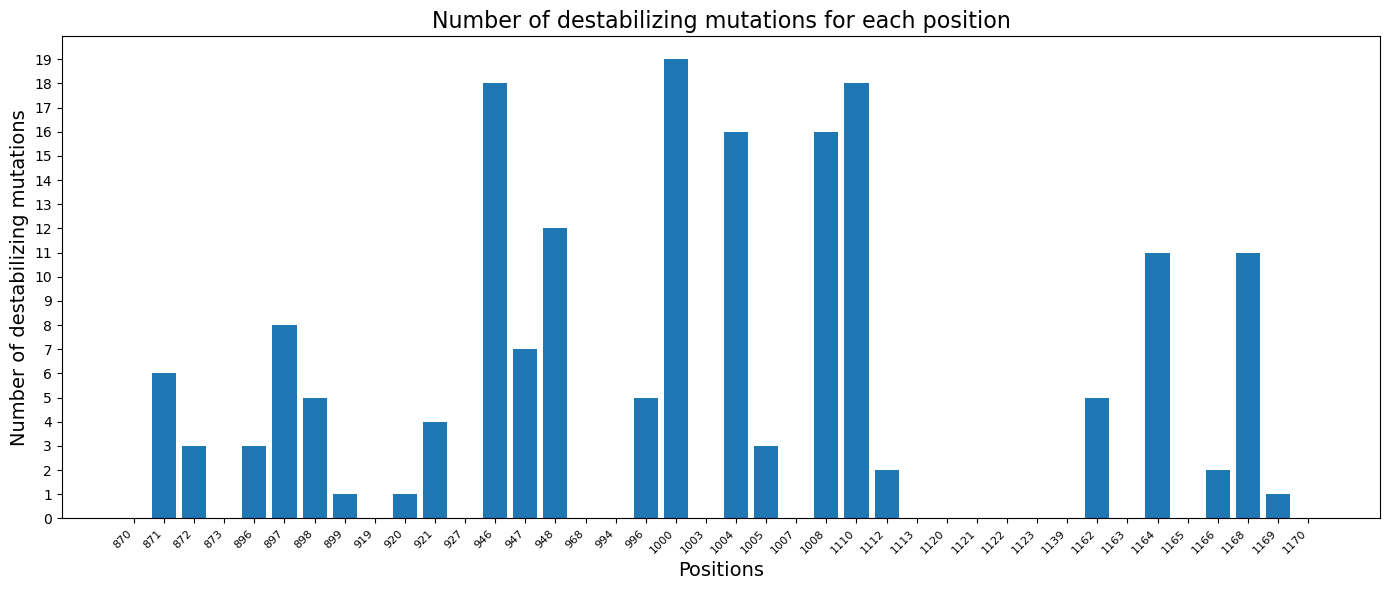

In [138]:
import matplotlib.pyplot as plt

# List of positions and counts
positions_counts = [
    (870, 0), (873, 0), (919, 0), (927, 0), (968, 0), (994, 0), (1003, 0), 
    (1007, 0), (1113, 0), (1120, 0), (1121, 0), (1122, 0), (1123, 0), 
    (1139, 0), (1163, 0), (1165, 0), (1170, 0), (899, 1), (920, 1), 
    (1169, 1), (1112, 2), (1166, 2), (872, 3), (896, 3), (1005, 3), 
    (921, 4), (898, 5), (996, 5), (1162, 5), (871, 6), (947, 7), 
    (897, 8), (1164, 11), (1168, 11), (948, 12), (1004, 16), 
    (1008, 16), (946, 18), (1110, 18), (1000, 19)
]

# Sort positions_counts based on position values
positions_counts.sort(key=lambda x: x[0])

# Extract positions and counts separately
positions = [str(item[0]) for item in positions_counts]
counts = [item[1] for item in positions_counts]

# Plot for all positions
plt.figure(figsize=(14, 6))
bars = plt.bar(positions, counts)
plt.xlabel('Positions', fontsize=14)
plt.ylabel('Number of destabilizing mutations', fontsize=14)
plt.title('Number of destabilizing mutations for each position', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(range(int(max(counts)) + 1))
plt.tight_layout()

plt.show()

In [157]:
# Reading alphamissense results
import re

infile = open("alphamissense_P54132.tsv", "r")
alphamissense_list = []
destabilizing_list = ['P871G', 'P871W', 'P871S', 'P871Y', 'P871N', 'P871E', 'K872G', 'K872P', 'K872T', 'L896W', 'L896Y', 'L896R', 'S897L', 'S897F', 'S897W', 'S897T', 'S897Y', 'S897K', 'S897R', 'S897H', 'R898F', 'R898W', 'R898P', 'R898Y', 'R898D', 'R899P', 'A920P', 'G921V', 'G921I', 'G921P', 'G921T', 'T946G', 'T946A', 'T946V', 'T946L', 'T946I', 'T946M', 'T946F', 'T946W', 'T946P', 'T946C', 'T946Y', 'T946N', 'T946Q', 'T946D', 'T946E', 'T946K', 'T946R', 'T946H', 'I947G', 'I947A', 'I947S', 'I947N', 'I947D', 'I947E', 'I947H', 'A948L', 'A948M', 'A948F', 'A948W', 'A948P', 'A948Y', 'A948N', 'A948D', 'A948E', 'A948K', 'A948R', 'A948H', 'H996P', 'H996D', 'H996E', 'H996K', 'H996R', 'R1000G', 'R1000A', 'R1000V', 'R1000L', 'R1000I', 'R1000M', 'R1000F', 'R1000W', 'R1000P', 'R1000S', 'R1000T', 'R1000C', 'R1000Y', 'R1000N', 'R1000Q', 'R1000D', 'R1000E', 'R1000K', 'R1000H', 'L1004G', 'L1004A', 'L1004F', 'L1004W', 'L1004P', 'L1004S', 'L1004T', 'L1004C', 'L1004Y', 'L1004N', 'L1004Q', 'L1004D', 'L1004E', 'L1004K', 'L1004R', 'L1004H', 'I1005W', 'I1005D', 'I1005H', 'E1008G', 'E1008A', 'E1008V', 'E1008L', 'E1008I', 'E1008M', 'E1008F', 'E1008W', 'E1008P', 'E1008S', 'E1008T', 'E1008C', 'E1008Y', 'E1008N', 'E1008R', 'E1008H', 'T1110G', 'T1110A', 'T1110V', 'T1110L', 'T1110I', 'T1110M', 'T1110F', 'T1110W', 'T1110P', 'T1110C', 'T1110Y', 'T1110N', 'T1110Q', 'T1110D', 'T1110E', 'T1110K', 'T1110R', 'T1110H', 'N1112D', 'N1112E', 'N1162Y', 'N1162E', 'N1162K', 'N1162R', 'N1162H', 'N1164G', 'N1164A', 'N1164I', 'N1164F', 'N1164W', 'N1164P', 'N1164S', 'N1164Y', 'N1164Q', 'N1164E', 'N1164H', 'Q1166T', 'Q1166E', 'I1168G', 'I1168A', 'I1168W', 'I1168P', 'I1168S', 'I1168T', 'I1168C', 'I1168N', 'I1168Q', 'I1168D', 'I1168E', 'A1169R']
positions = [870, 871, 872, 873, 896, 897, 898, 899, 919, 920, 921, 927, 946, 947, 948, 968, 994, 996, 1000, 1003, 1004, 1005, 1007, 1008, 1110, 1112, 1113, 1120, 1121, 1122, 1123, 1139, 1162, 1163, 1164, 1165, 1166, 1168, 1169, 1170]
for i, line in enumerate(infile):
    if i >= 1:
        position = int(re.search(r'\d+', line.split()[1]).group())
        if position in positions and line.split()[3] == "pathogenic":
            alphamissense_list.append(line.split()[1])
infile.close()
#print(alphamissense_list)
#print(destabilizing_list)

# Find overlap with alphamissense pathogenic mutations
overlap_patho = set(alphamissense_list) & set(destabilizing_list)
print("Overlap between alphamissense 'pathogenic' mutations and detstabilizing mutations found after running mutateX")
for element in overlap_patho:
    print(element)

Overlap between alphamissense 'pathogenic' mutations and detstabilizing mutations found after running mutateX
P871Y
T946K
N1164W
E1008A
N1112D
R1000Y
S897K
R1000E
L1004C
E1008G
P871G
I947A
R1000D
A948R
L1004Y
S897Y
L1004D
E1008M
R899P
I1168Q
K872G
L1004F
T1110P
N1162E
R1000A
L896Y
P871S
T946W
L1004T
I1168C
A948M
T946Y
A948K
R1000F
I1168W
G921P
E1008I
E1008V
T1110V
N1162Y
I1168G
R1000M
R898W
R1000G
L1004E
I1005H
P871E
E1008P
L896W
K872P
E1008R
S897H
L1004A
I1005D
R898F
A1169R
I947H
L1004S
L1004P
I1168N
T1110E
R898Y
S897T
A948L
E1008L
R1000H
T946A
T1110C
T946M
I1168P
L1004N
T946D
I947G
A948F
T1110Y
R898P
L1004Q
A948W
E1008F
R1000V
T1110W
T1110M
I947S
S897W
I1005W
A948N
R1000L
T1110I
E1008C
L1004G
T946I
R1000Q
E1008W
N1164E
R898D
T946F
A948P
N1112E
E1008Y
R1000I
T946R
L1004K
T946Q
T1110H
T946N
T1110N
S897L
T946H
A948H
G921V
S897F
P871W
R1000K
L896R
T1110Q
S897R
E1008S
T1110R
T1110L
R1000W
T946G
I947E
E1008T
N1162R
E1008N
I1168D
R1000S
N1162K
R1000P
T1110F
I1168S
P871N
A948D
T946L
R1000T
K